<h1>MIDTERM HANDSON- Chicago's Crime ANALYTICS</h1>

<H2>Analyst: John Lennon Jarabese</H2>


In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

In [3]:
data = pd.read_csv('dataset\\Chicago_Crimes.csv')
data

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


In [4]:
data.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    857
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            3
FBI Code                  0
X Coordinate             90
Y Coordinate             90
Year                      0
Updated On                0
Latitude                 90
Longitude                90
Location                 90
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249123 entries, 0 to 249122
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    249123 non-null  int64  
 1   Case Number           249123 non-null  object 
 2   Date                  249123 non-null  object 
 3   Block                 249123 non-null  object 
 4   IUCR                  249123 non-null  object 
 5   Primary Type          249123 non-null  object 
 6   Description           249123 non-null  object 
 7   Location Description  248266 non-null  object 
 8   Arrest                249123 non-null  bool   
 9   Domestic              249123 non-null  bool   
 10  Beat                  249123 non-null  int64  
 11  District              249123 non-null  int64  
 12  Ward                  249123 non-null  int64  
 13  Community Area        249120 non-null  float64
 14  FBI Code              249123 non-null  object 
 15  

<h2>Filling up Null values</h2>

In [6]:
data['Case Number'] = data['Case Number'].fillna(data['Case Number'].mode()[0])
data['Date'] = data['Date'].fillna(data['Date'].mode()[0])
data['Block'] = data['Block'].fillna(data['Block'].mode()[0])
data['IUCR'] = data['IUCR'].fillna(data['IUCR'].mode()[0])
data['Primary Type'] = data['Primary Type'].fillna(data['Primary Type'].mode()[0])
data['Description'] = data['Description'].fillna(data['Description'].mode()[0])
data['Location Description'] = data['Location Description'].fillna(data['Location Description'].mode()[0])
data['Arrest'] = data['Arrest'].fillna(data['Arrest'].mode()[0])
data['Domestic'] = data['Domestic'].fillna(data['Domestic'].mode()[0])
data['Beat'] = data['Beat'].fillna(data['Beat'].mode()[0])
data['District'] = data['District'].fillna(data['District'].mode()[0])
data['Ward'] = data['Ward'].fillna(data['Ward'].mode()[0])
data['Community Area'] = data['Community Area'].fillna(data['Community Area'].mode()[0])
data['FBI Code'] = data['FBI Code'].fillna(data['FBI Code'].mode()[0])
data['X Coordinate'] = data['X Coordinate'].fillna(data['X Coordinate'].mode()[0])
data['Y Coordinate'] = data['Y Coordinate'].fillna(data['Y Coordinate'].mode()[0])
data['Year'] = data['Year'].fillna(data['Year'].mode()[0])
data['Updated On'] = data['Updated On'].fillna(data['Updated On'].mode()[0])
data['Latitude'] = data['Latitude'].fillna(data['Latitude'].mode()[0])
data['Longitude'] = data['Longitude'].fillna(data['Longitude'].mode()[0])
data['Location'] = data['Location'].fillna(data['Location'].mode()[0])

In [7]:
data["Case Number"] = data["Case Number"].astype("category")
data["Date"] = data["Date"].astype("category")
data["Block"] = data["Block"].astype("category")
data["IUCR"] = data["IUCR"].astype("category")
data["Primary Type"] = data["Primary Type"].astype("category")
data["Description"] = data["Description"].astype("category")
data["Location Description"] = data["Location Description"].astype("category")
data["FBI Code"] = data["FBI Code"].astype("category")
data["Updated On"] = data["Updated On"].astype("category")
data["Location"] = data["Location"].astype("category")

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249123 entries, 0 to 249122
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   ID                    249123 non-null  int64   
 1   Case Number           249123 non-null  category
 2   Date                  249123 non-null  category
 3   Block                 249123 non-null  category
 4   IUCR                  249123 non-null  category
 5   Primary Type          249123 non-null  category
 6   Description           249123 non-null  category
 7   Location Description  249123 non-null  category
 8   Arrest                249123 non-null  bool    
 9   Domestic              249123 non-null  bool    
 10  Beat                  249123 non-null  int64   
 11  District              249123 non-null  int64   
 12  Ward                  249123 non-null  int64   
 13  Community Area        249123 non-null  float64 
 14  FBI Code              249123 non-nul

In [9]:
data.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

<h1>35 Questions with insights</h1>

<h2>Q1: What are the top 10 most common crime types?</h2>

In [10]:
crime_counts = data['Primary Type'].value_counts().head(10)
crime_counts

Primary Type
THEFT                  59201
BATTERY                44579
CRIMINAL DAMAGE        27094
ASSAULT                22615
MOTOR VEHICLE THEFT    19604
OTHER OFFENSE          16781
DECEPTIVE PRACTICE     14991
BURGLARY                8443
ROBBERY                 8200
WEAPONS VIOLATION       7164
Name: count, dtype: int64

<h3>Insight: These crimes represent the majority of incidents in Chicago.</h3>

<h2>Q2: Which year had the most reported crimes?</h2>

In [11]:
year_counts = data['Year'].value_counts()
most_year = year_counts[year_counts == year_counts.max()]
most_year

Year
2024    188918
Name: count, dtype: int64

<h3>Insight: This year marks the peak in crime reporting.</h3>

<h2>Q3: Which year had the least reported crimes?</h2>

In [12]:
least_year = year_counts[year_counts == year_counts.min()]
least_year

Year
2025    60205
Name: count, dtype: int64

<h3>Insight: This shows the lowest activity period.</h3>

<h2>Q4: How many unique crime types exist in the dataset?</h2>

In [13]:
unique = (data['Primary Type'].nunique())
unique

31

<h3>Insight: Chicago experiences a wide variety of crime categories.</h3>

<h2>Q5: Which location type has the most reported crimes?</h2>

In [14]:
location = (data['Location Description'].value_counts().head(1))
location

Location Description
STREET    66897
Name: count, dtype: int64

<h3>Insight: This location is the most vulnerable to crime.</h3>

<h2>Q6: What is the mean year of reported crimes?</h2>

In [15]:
mean_year = data['Year'].mean()
print("Mean crime year:", mean_year)

Mean crime year: 2024.2416677705392


<h3>Insight: The average year gives a midpoint of crime reporting. It shows the dataset’s balance of old and recent crime data.</h3>

<h2>Q7: What is the maximum year of crime reports?</h2>

In [16]:
max_year = data['Year'].max()
print("Latest crime year:", max_year)

Latest crime year: 2025


<h3>Insight: This tells us the most recent year of available data. 
    It helps confirm if the dataset is up to date.
</h3>

<h2>Q8: What is the minimum year of crime reports?</h2>

In [17]:
min_year = data['Year'].min()
print("Earliest crime year:", min_year)

Earliest crime year: 2024


<h3>Insight: This shows the oldest crime records in the dataset. It helps us understand the historical coverage of the data.
</h3>

<h2>Q9: What is the proportion of arrests made?</h2>

In [18]:
arrest_rate = data['Arrest'].value_counts(normalize=True) * 100
arrest_rate

Arrest
False    85.548504
True     14.451496
Name: proportion, dtype: float64

<h3>Insight: This shows how many crimes resulted in arrests compared to those that didn’t. It provides an idea of law enforcement effectiveness.
</h3>

<h2>Q10: Which crime has the most arrests?</h2>

In [19]:
crime_arrests = data[data['Arrest'] == True]['Primary Type'].value_counts().head(1)
crime_arrests

Primary Type
BATTERY    7647
Name: count, dtype: int64

<h3>Insight: This identifies the crime most likely to result in an arrest. It may reflect easier detection or stronger enforcement for that type.
</h3>

<h2>Q11: Which crime has the least arrests?</h2>

In [20]:
crime_least_arrests = data[data['Arrest'] == True]['Primary Type'].value_counts().tail(1)
crime_least_arrests

Primary Type
HUMAN TRAFFICKING    0
Name: count, dtype: int64

<h3>Insight: This shows the crime type least likely to lead to arrest. It may suggest difficulties in solving or prosecuting that type.
</h3>

<h2>Q12: Compare counts of domestic vs non-domestic crimes.</h2>

In [21]:
domestic_counts = data['Domestic'].value_counts()
domestic_counts

Domestic
False    202776
True      46347
Name: count, dtype: int64

<h3>Insight: This highlights the scale of domestic-related crimes versus others. It shows how common household or relationship-driven crimes are.</h3>

<h2>Q13: Which ward has the most crimes?</h2>

ward_counts = data['Ward'].value_counts()
most_ward = ward_counts[ward_counts == ward_counts.max()]
most_ward

<h3>Insight: This identifies the ward with the highest crime rate. Local officials may prioritize resources in this area.
</h3>

<h2>Q14: Which ward has the least crimes?</h2>

In [22]:
ward_counts = data['Ward'].value_counts()
least_ward = ward_counts[ward_counts == ward_counts.min()]
least_ward

Ward
38    2118
Name: count, dtype: int64

<h3>Insight: This shows the ward with the fewest crimes. It may reflect safer communities or underreporting.
</h3>

<h2>Q15: Maximum and minimum crimes in a single year</h2>

In [23]:
print("Max crimes in a year:", year_counts.max())
print("Min crimes in a year:", year_counts.min())

Max crimes in a year: 188918
Min crimes in a year: 60205


<h3>Insight: These values show the extremes of yearly crime volumes. It helps compare the worst and best years for safety in Chicago.
</h3>

<h1>Questions with Visualization</h1>

<h2>Q16: Plot top 10 crimes as a barplot.</h2>

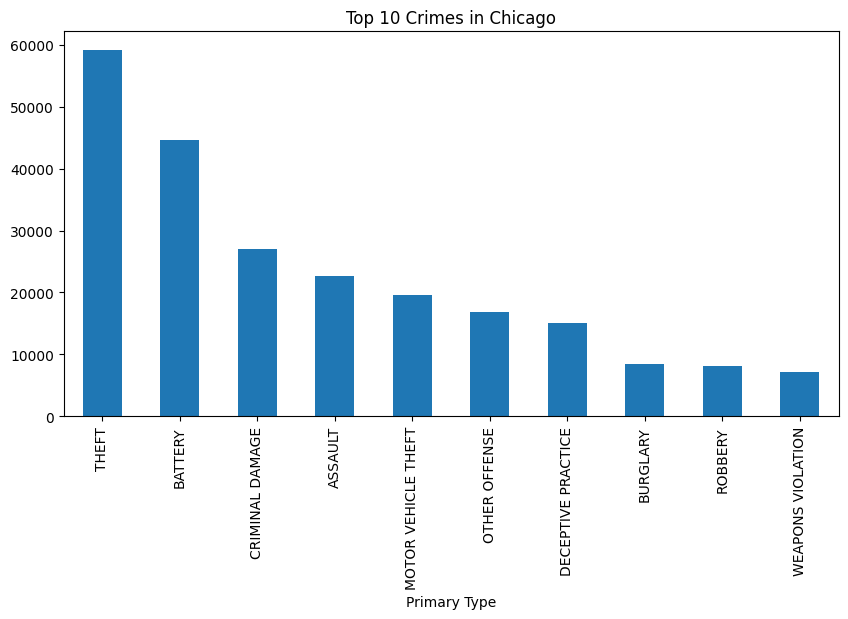

In [24]:
crime_counts.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Crimes in Chicago")
plt.show()

<h3>Insight: This visualization makes it easy to compare major crime types. It highlights which crimes dominate the city’s crime profile.
</h3>

<h2>Q17: Plot crimes per year as a line graph.</h2>

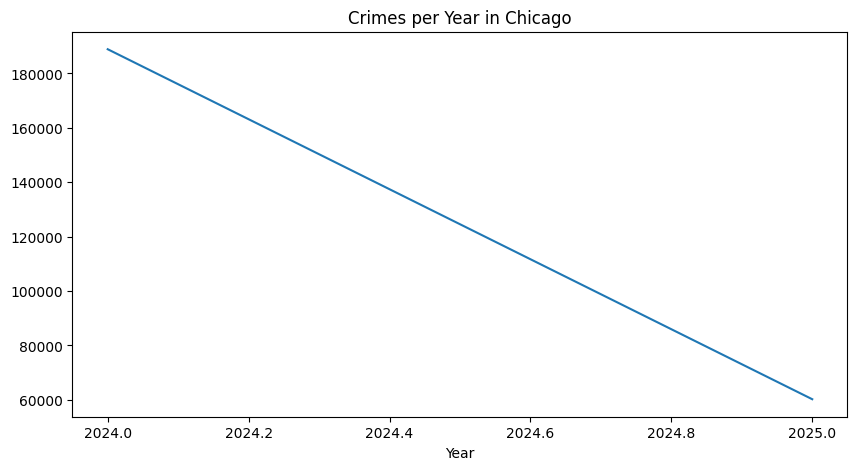

In [25]:
year_counts.sort_index().plot(kind='line', figsize=(10,5))
plt.title("Crimes per Year in Chicago")
plt.show()

<h3>Insight: The line graph shows trends over time. It helps spot rises and declines across different years.
</h3>

<h2>Q18: Plot top 10 crime locations.</h2>

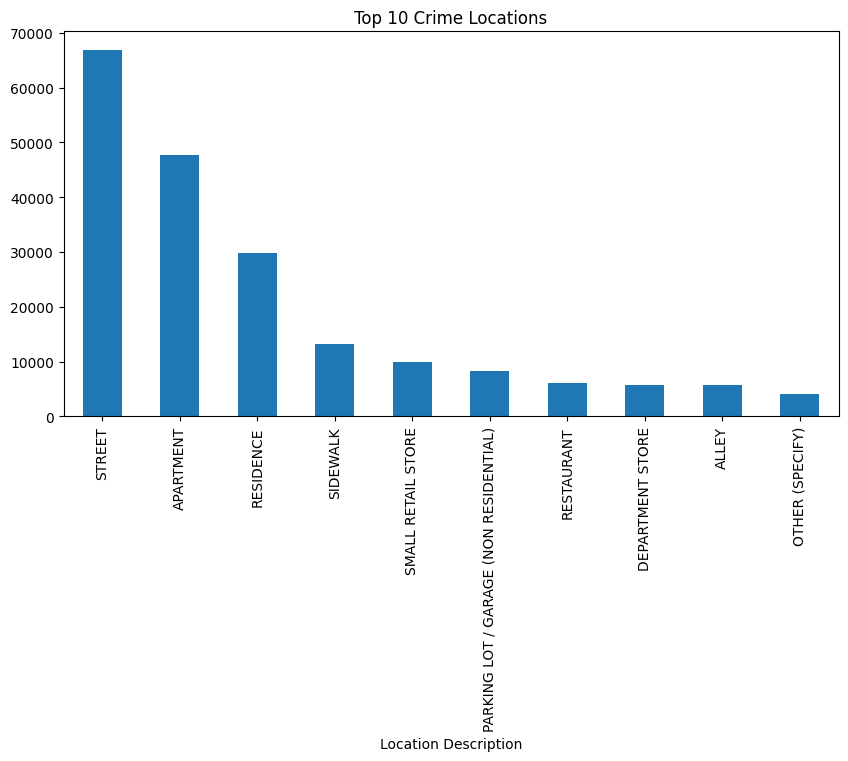

In [26]:
location_counts = data['Location Description'].value_counts().head(10)
location_counts.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Crime Locations")
plt.show()

<h3>Insight: The plot highlights which environments face more risk. It reveals areas where safety measures should be strengthened.
</h3>

<h2>Q19: Compare arrests vs non-arrests.</h2>

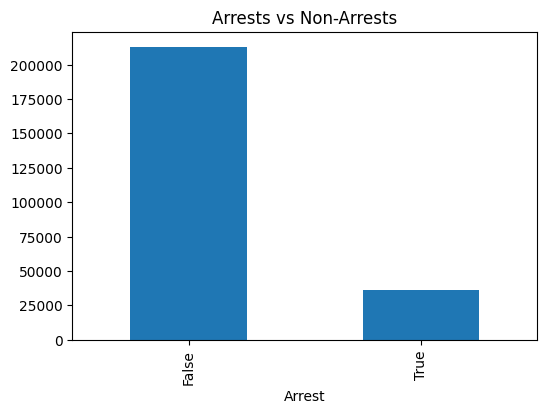

In [27]:
data['Arrest'].value_counts().plot(kind='bar', figsize=(6,4))
plt.title("Arrests vs Non-Arrests")
plt.show()

<h3>Insight: This graph shows the large difference between arrests and non-arrests. It emphasizes that many crimes remain unsolved.
</h3>

<h2>Q20: Compare domestic vs non-domestic crimes.</h2>

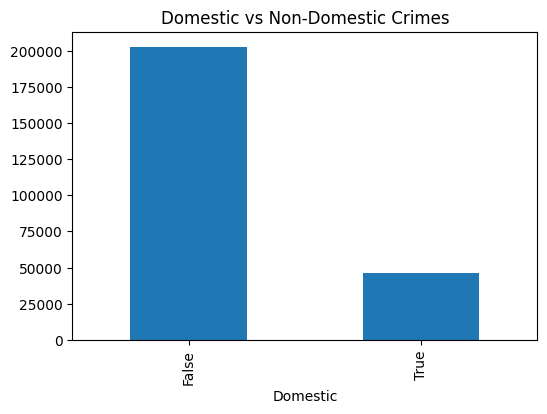

In [28]:
data['Domestic'].value_counts().plot(kind='bar', figsize=(6,4))
plt.title("Domestic vs Non-Domestic Crimes")
plt.show()

<h3>Insight: The chart shows domestic crimes are far fewer compared to others. It emphasizes how public crimes dominate reports.
</h3>

<h2>Q21: Top 5 wards with most crimes.</h2>

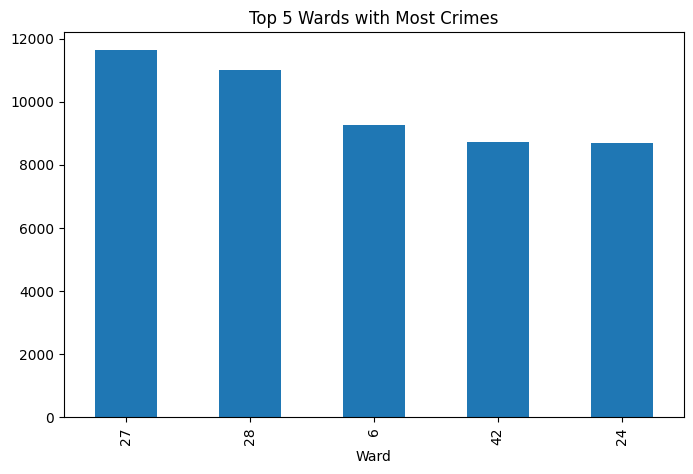

In [29]:
ward_counts.head(5).plot(kind='bar', figsize=(8,5))
plt.title("Top 5 Wards with Most Crimes")
plt.show()

<h3>Insight: Some wards face much higher crime than others. This helps guide where law enforcement should focus more.
</h3>

<h2>Q22: Monthly crime trends.</h2>

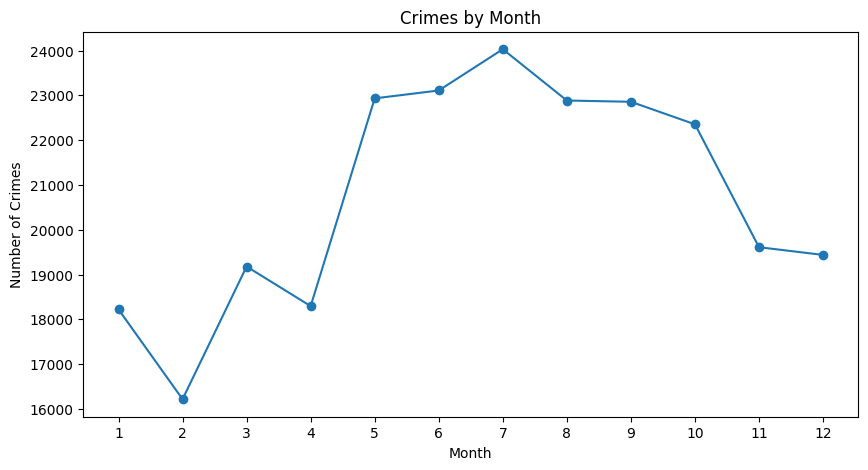

In [30]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Month'] = data['Date'].dt.month
monthly_counts = data['Month'].value_counts().sort_index()

# Plot
monthly_counts.plot(kind='line', figsize=(10,5), marker='o')
plt.title("Crimes by Month")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.xticks(range(1,13))  # Show months 1 to 12
plt.show()

<h3>Insight: Monthly trends show seasonal changes in crime. This helps predict when crime is more likely to rise.
</h3>

<h2>Q23: Arrest rate by year.</h2>

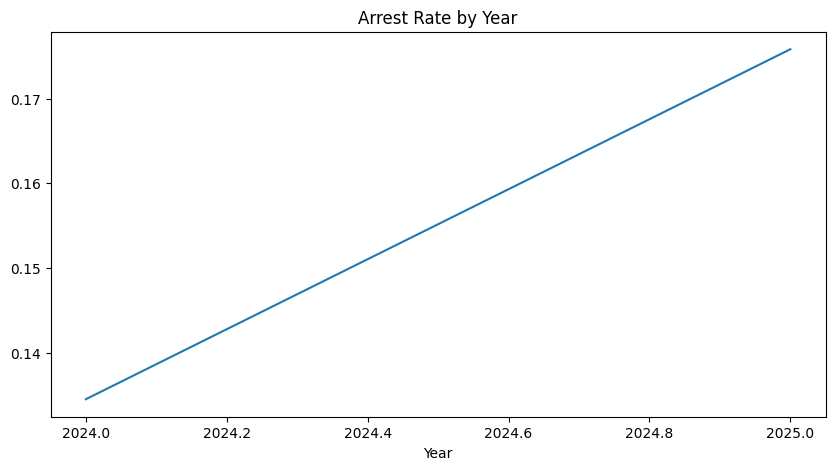

In [31]:
arrest_by_year = data.groupby('Year')['Arrest'].mean()
arrest_by_year.plot(kind='line', figsize=(10,5))
plt.title("Arrest Rate by Year")
plt.show()

<h3>Insight: This shows whether police success has improved or declined. It adds perspective to long-term enforcement efficiency.
</h3>

<h2>Q24: Top 5 crimes with arrests.</h2>

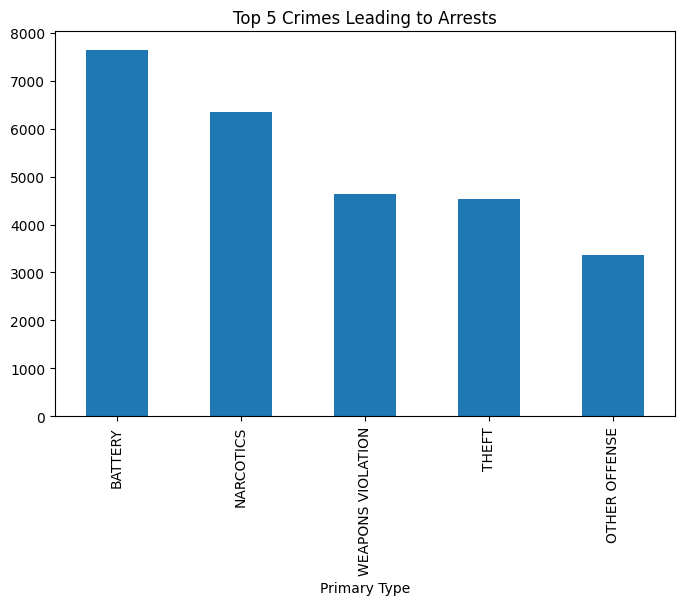

In [32]:
top_arrest_crimes = data[data['Arrest'] == True]['Primary Type'].value_counts().head(5)
top_arrest_crimes.plot(kind='bar', figsize=(8,5))
plt.title("Top 5 Crimes Leading to Arrests")
plt.show()

<h3>Insight: This graph shows which crimes are often solved. It reflects law enforcement’s stronger performance against these crimes.
</h3>

<h2>Q25: Trend of top crime type over years.</h2>

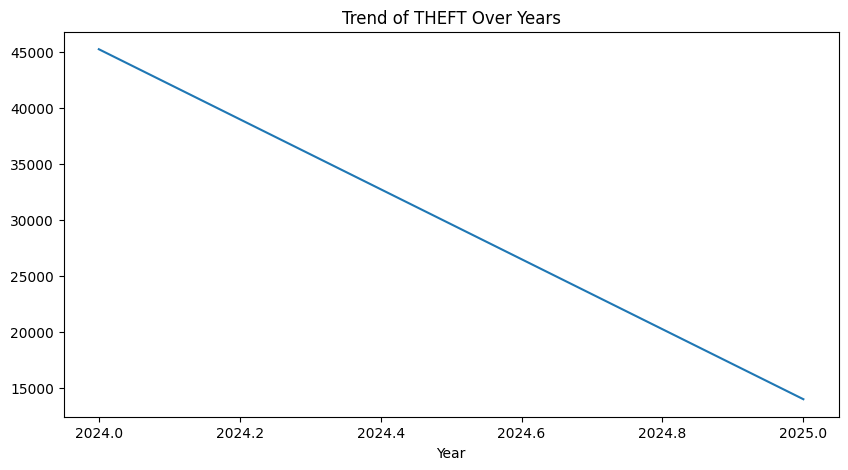

In [33]:
top_crime = crime_counts.index[0]
trend = data[data['Primary Type'] == top_crime]['Year'].value_counts().sort_index()
trend.plot(kind='line', figsize=(10,5))
plt.title(f"Trend of {top_crime} Over Years")
plt.show()

<h3>Insight: The line shows how the city’s most common crime changed over time. It can reveal whether prevention methods are working.
</h3>

<h1>Questions with Heatmap</h1>

<h2>Q26: Create a basic heatmap of crime locations.</h2>

In [34]:
m = folium.Map(location=[41.8781, -87.6298], zoom_start=11)
HeatMap(data[['Latitude','Longitude']].dropna().sample(5000)).add_to(m)
m

<h3>Insight: The heatmap shows hotspots of crime across the city. It gives a geographic perspective of safety concerns.
</h3>

<h2>Q27: Heatmap of arrests only.</h2>

In [35]:
m = folium.Map(location=[41.8781, -87.6298], zoom_start=11)
HeatMap(data[data['Arrest']==True][['Latitude','Longitude']].dropna().sample(3000)).add_to(m)
m

<h3>Insight: This highlights areas where arrests are concentrated. It may show neighborhoods with stronger policing.
</h3>

<h2>Q28: Heatmap of non-arrests.</h2>

In [36]:
m = folium.Map(location=[41.8781, -87.6298], zoom_start=11)
HeatMap(data[data['Arrest']==False][['Latitude','Longitude']].dropna().sample(3000)).add_to(m)
m

<h3>Insight: Non-arrest areas may reveal challenges in law enforcement. These areas could need better investigations.
</h3>

<h2>Q29: Heatmap of domestic crimes.</h2>

In [37]:
m = folium.Map(location=[41.8781, -87.6298], zoom_start=11)
HeatMap(data[data['Domestic']==True][['Latitude','Longitude']].dropna().sample(2000)).add_to(m)
m

<h3>Insight: This shows domestic crime distribution across neighborhoods. It emphasizes household-related risks in different zones.
</h3>

<h2>Q30: Heatmap of non-domestic crimes.</h2>

In [38]:
m = folium.Map(location=[41.8781, -87.6298], zoom_start=11)
HeatMap(data[data['Domestic']==False][['Latitude','Longitude']].dropna().sample(2000)).add_to(m)
m

<h3>Insight: This reveals public-space crimes. It shows city blocks where public safety risks are higher.
</h3>

<h2>Q31: Heatmap of top crime type.</h2>

In [39]:
top_crime_type = crime_counts.index[0]
m = folium.Map(location=[41.8781, -87.6298], zoom_start=11)
HeatMap(data[data['Primary Type']==top_crime_type][['Latitude','Longitude']].dropna().sample(3000)).add_to(m)
m

<h3>Insight: This shows where the most common crime clusters. It helps target interventions against the city’s biggest crime issue.
</h3>

<h2>Q32: Heatmap of top 5 crimes combined.</h2>

In [40]:
top5_crimes = crime_counts.index[:5]
m = folium.Map(location=[41.8781, -87.6298], zoom_start=11)
HeatMap(data[data['Primary Type'].isin(top5_crimes)][['Latitude','Longitude']].dropna().sample(4000)).add_to(m)
m

<h3>Insight: Combining multiple crime types shows broader hotspots. It helps in identifying multipurpose crime-prone zones.
</h3>

<h2>Q33: Heatmap of recent year crimes.</h2>

In [41]:
recent_year = data['Year'].max()
m = folium.Map(location=[41.8781, -87.6298], zoom_start=11)
HeatMap(data[data['Year']==recent_year][['Latitude','Longitude']].dropna().sample(3000)).add_to(m)
m

<h3>Insight: This displays the latest crime hotspots. It helps visualize current safety conditions.
</h3>

<h2>Q34: Heatmap of earliest year crimes.</h2>

In [42]:
earliest_year = data['Year'].min()
m = folium.Map(location=[41.8781, -87.6298], zoom_start=11)
HeatMap(data[data['Year']==earliest_year][['Latitude','Longitude']].dropna().sample(3000)).add_to(m)
m

<h3>Insight: The earliest year’s data shows historical crime clusters. It gives a sense of how crime patterns may have shifted over time.
</h3>

<h2>Q35: Heatmap comparing two selected crime types.</h2>

In [43]:
two_crimes = data[data['Primary Type'].isin(['THEFT','BATTERY'])]
m = folium.Map(location=[41.8781, -87.6298], zoom_start=11)
HeatMap(two_crimes[['Latitude','Longitude']].dropna().sample(4000)).add_to(m)
m

<h3>Insight: Comparing theft and battery shows overlapping and unique hotspots. It highlights how different crimes spread across the city.
</h3>